In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import stats
mpl.rcParams['figure.dpi'] = 150
sns.set()

In [2]:
milk = pd.read_csv("AllMilkingsDaily_Weather.csv")
milk["Timestamp"] = pd.to_datetime(milk["Timestamp"])
milk = milk.set_index("Timestamp")

milk = milk[milk["FarmName_Pseudo"].isin(["ad0a39f5", "752efd72", "5c06d92d", "540275a1", "a624fb9a", "f454e660", "ab18b151"])]

In [3]:
rDict = {"a624fb9a": "Farm 1",
    "ab18b151": "Farm 2",
    "540275a1": "Farm 3",
    "5b581702": "Farm 4",
    "5c06d92d": "Farm 5",
    "a756bc39": "Farm 6",
    "ad0a39f5": "Farm 7",
    "752efd72": "Farm 8",
    "f454e660": "Farm 9"}
    
milk = milk.replace({"FarmName_Pseudo": rDict})

farmNames = milk["FarmName_Pseudo"].unique()
farmNames = sorted(farmNames)

In [4]:
colors = ["#CE0037", "#00b0b9", "#FFB81C", "#509E2F", "#672146", "#007681", "#996017", "#79863C"]
customPalette = sns.set_palette(sns.color_palette(colors))

The slope for T is -0.05244581717789022
The slope for THI is -0.027257976089488874


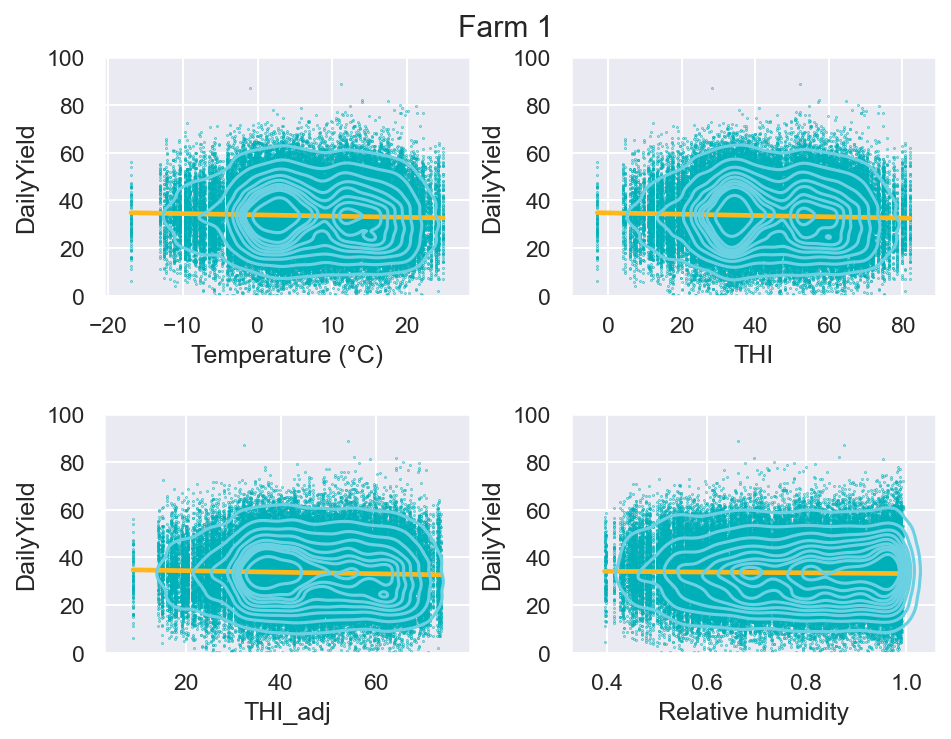

The slope for T is -0.1556856874111502
The slope for THI is -0.07725153255002008


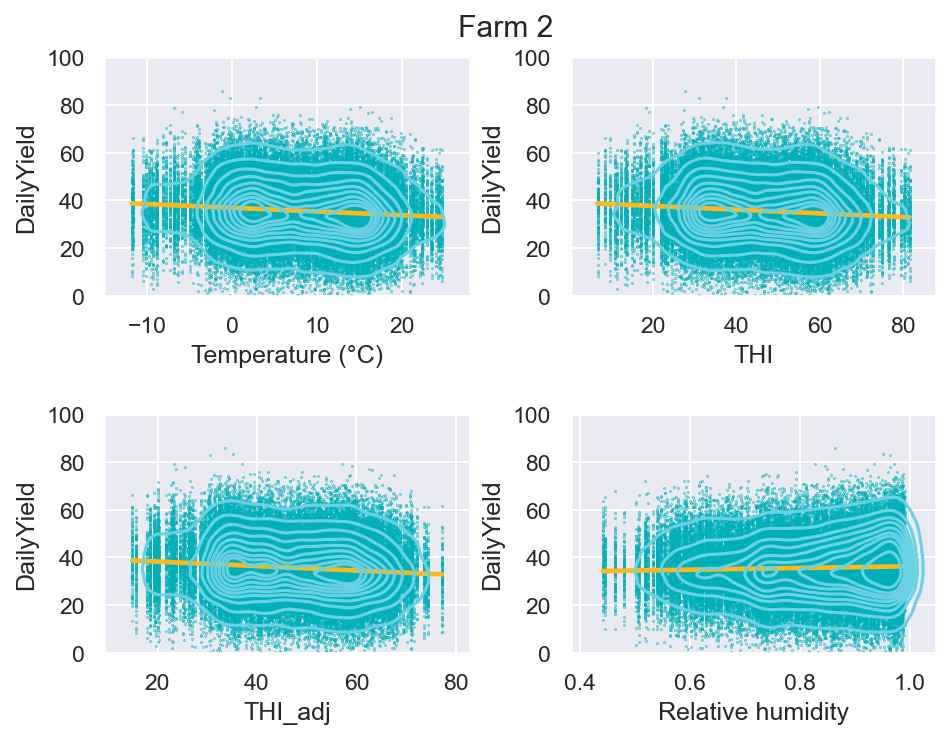

The slope for T is -0.030822804529392643
The slope for THI is -0.01785732168255211


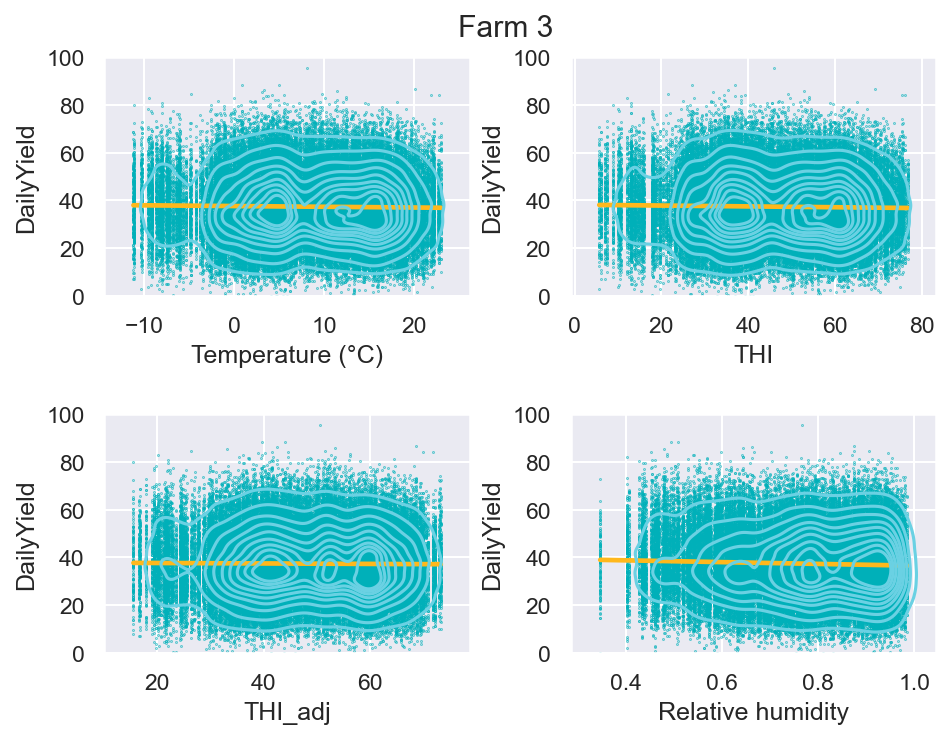

The slope for T is 0.016746982436890306
The slope for THI is 0.0073091555494741774


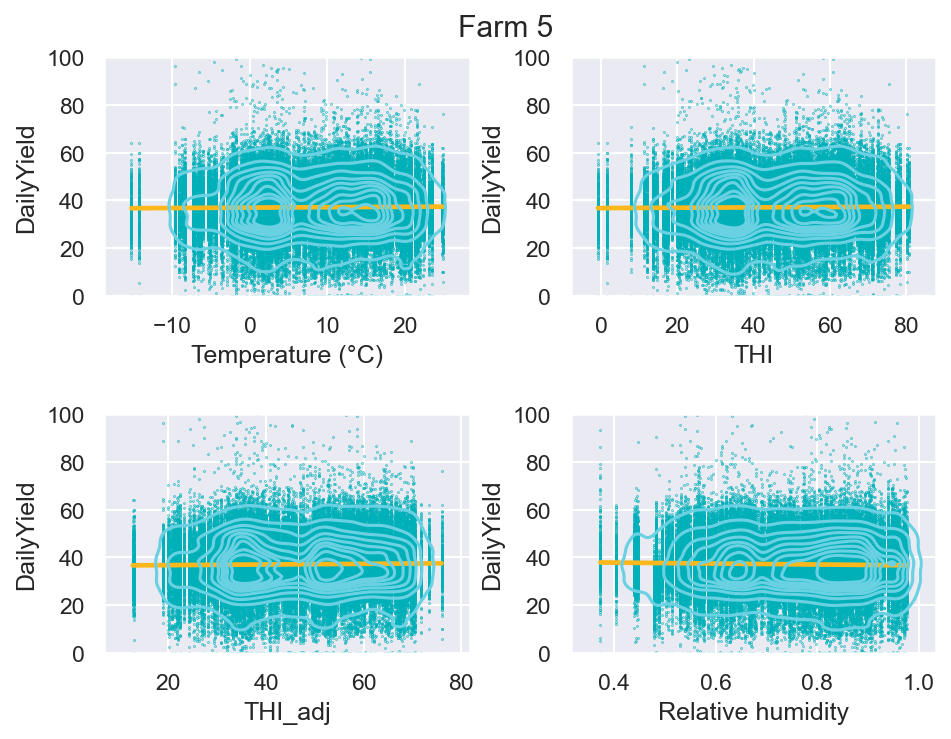

The slope for T is -0.013343580095844658
The slope for THI is -0.006227352479458019


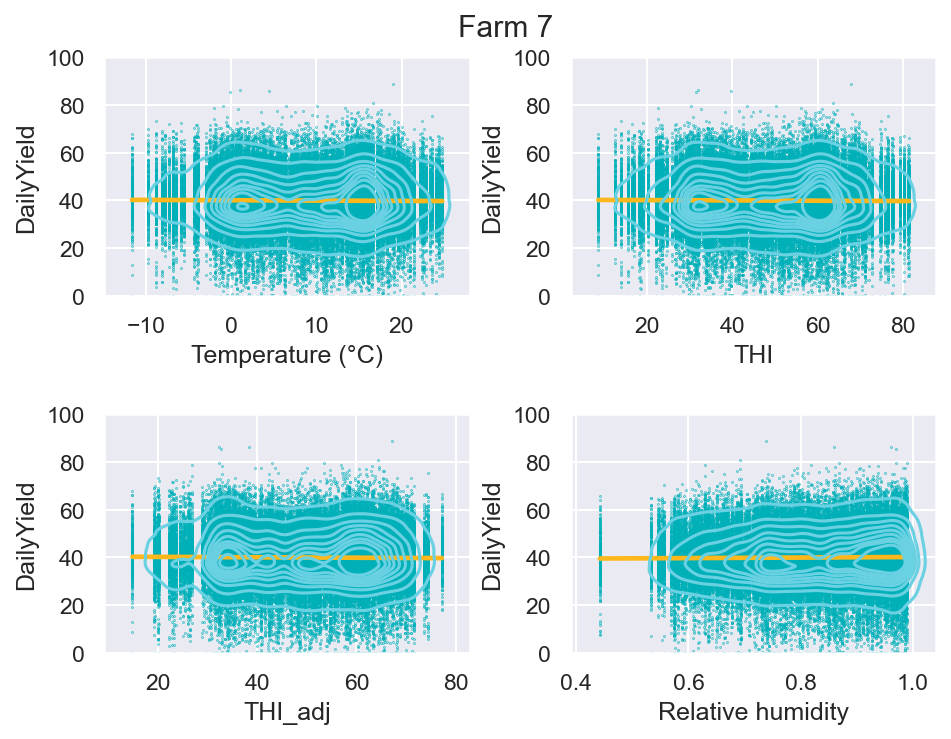

The slope for T is -0.11159394280395522
The slope for THI is -0.05409251296684064


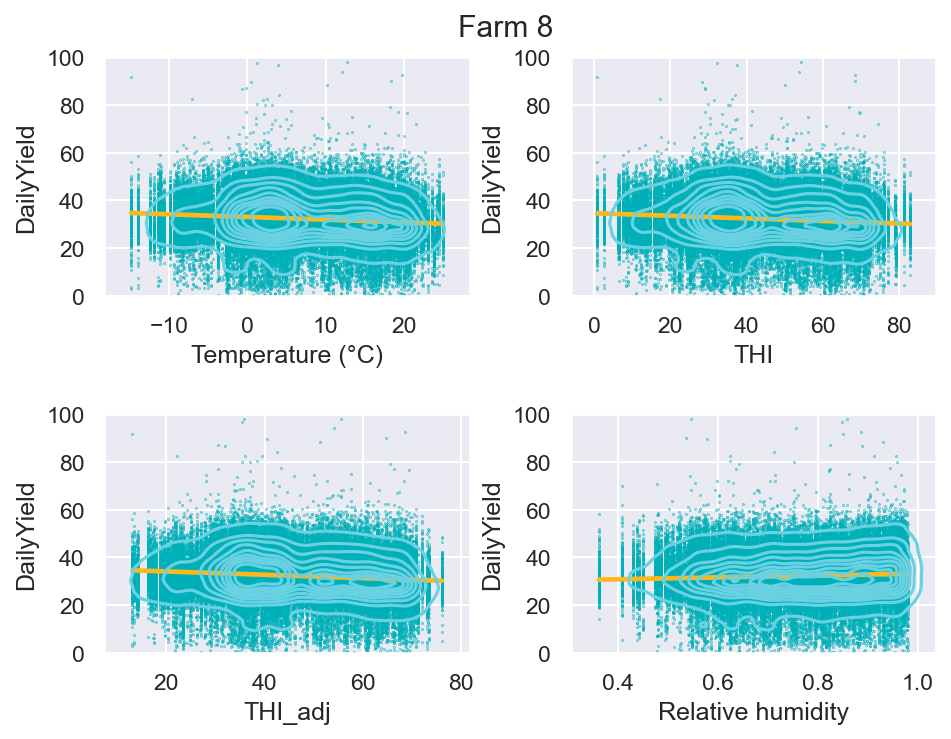

The slope for T is -0.02173175821492141
The slope for THI is -0.01132298707992956


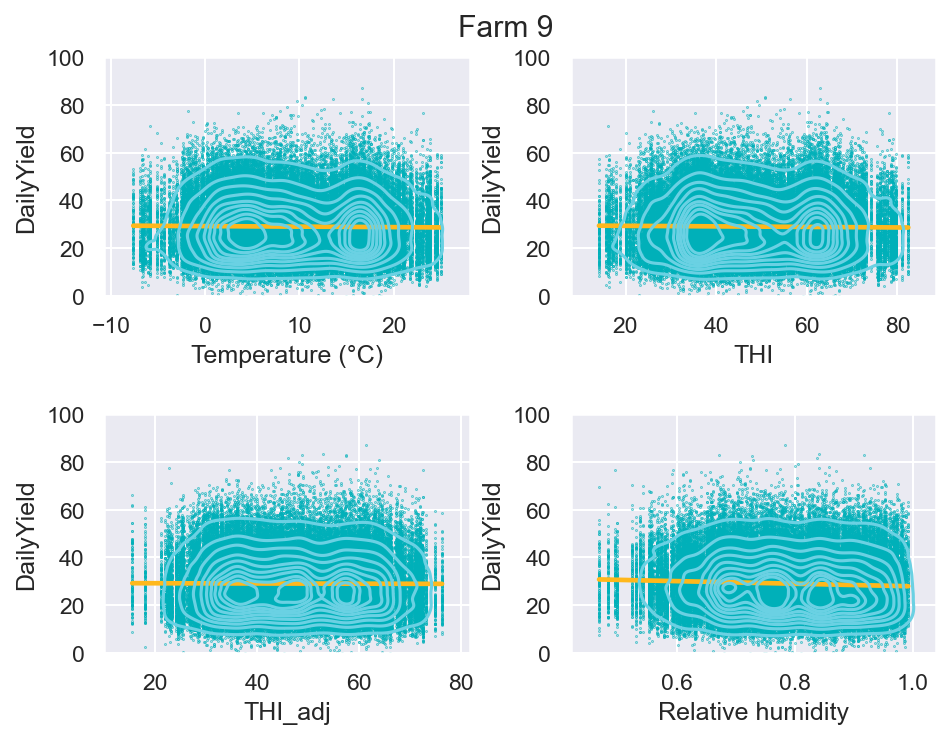

In [5]:
for name in farmNames:
    o = 1
    farm = milk[milk["FarmName_Pseudo"] == name]
    slope, intercept, r_value, p_value, std_err = stats.linregress(farm['T_C_mean'], farm['DailyYield'])
    print(f"The slope for T is {slope}")

    slope, intercept, r_value, p_value, std_err = stats.linregress(farm['THI_mean'], farm['DailyYield'])
    print(f"The slope for THI is {slope}")


    sns.set()
    fig, axs = plt.subplots(2, 2)
    fig.tight_layout(h_pad  = 3)
    axs = axs.ravel()
    sns.regplot(x = farm["T_C_mean"], y = farm["DailyYield"], ax=axs[0], color = "#00b0b9", line_kws={"color": "#ffb81c"}, order = o, scatter_kws={'s': 0.1})
    sns.regplot(x = farm["THI_mean"], y = farm["DailyYield"], ax=axs[1], color = "#00b0b9", line_kws={"color": "#ffb81c"}, order = o, scatter_kws={'s': 0.1})
    sns.regplot(x = farm["THI_adj_mean"], y = farm["DailyYield"], ax=axs[2], color = "#00b0b9", line_kws={"color": "#ffb81c"}, order = o, scatter_kws={'s': 0.1})
    sns.regplot(x = farm["r_sfc_mean"], y = farm["DailyYield"], ax=axs[3], color = "#00b0b9", line_kws={"color": "#ffb81c"}, order = o, scatter_kws={'s': 0.1})

    sns.kdeplot(x = farm["T_C_mean"], y = farm["DailyYield"], ax=axs[0], color = "#6ad1e3")
    sns.kdeplot(x = farm["THI_mean"], y = farm["DailyYield"], ax=axs[1], color = "#6ad1e3")
    sns.kdeplot(x = farm["THI_adj_mean"], y = farm["DailyYield"], ax=axs[2], color = "#6ad1e3")
    sns.kdeplot(x = farm["r_sfc_mean"], y = farm["DailyYield"], ax=axs[3], color = "#6ad1e3")

    axs[0].set(xlabel="Temperature (\N{DEGREE SIGN}C)", ylabel="DailyYield")
    axs[1].set(xlabel="THI", ylabel="DailyYield")
    axs[2].set(xlabel="THI_adj", ylabel="DailyYield")
    axs[3].set(xlabel="Relative humidity", ylabel="DailyYield")
    axs[0].set_ylim(0,100)
    axs[1].set_ylim(0,100)
    axs[2].set_ylim(0,100)
    axs[3].set_ylim(0,100)

    fig.suptitle(name)
    plt.subplots_adjust(top=0.92)

    plt.show()